# [GD-01~02] ResNet Ablation Study
_____

## 목차
### 1. 개요
    1.1 들어가기에 앞서
    1.2 루브릭 평가기준
 
### 2. 프로젝트: ResNet Ablation Study
    2.1 ResNet 기본 블록 구성하기
    2.2 ResNet-34, ResNet-50 Complete Model
    2.3 일반 네트워크(plain network) 만들기
    2.4 ResNet-50 vs Plain-50 또는 ResNet-34 vs Plain-34
    
    
### 3. 결론
    3.1 회고
    
-----

## 1. 개요

### 1.1 들어가기에 앞서

#### 실습 목표

- 직접 ResNet 구현하기
- 모델을 config에 따라서 변경 가능하도록 만들기
- 직접 실험해서 성능 비교하기

### 딥러닝 논문

딥러닝 논문의 구조는 **다음**과 같은 구조를 형성하고 있다.

![](https://images.velog.io/images/khkk4953/post/d181353d-98cf-4833-98e9-5ef73040ad46/GD1.png)

- ***Abstract*** : 전체 내용에 대한 요약
- ***Introduction*** : 문제에 대한 솔루션 요약
- ***Related Work*** : 본 내용과 유사했던 시도들
- ***Deep Residual Learning*** : 제안 방법의 구체적인 내용과 구현 방법
- ***Experiments*** : 비교실험 구조와 다양한 데이터셋에서의 시도가 가져온 실험결과를 검증
- ***References, appendix*** : 참고문헌, 부록

이번 주제에서 다루는 Resnet 논문에 대해 이해를 쉽게 돕기 위해 간략하게 작성했다.


## Resnet 논문
**(내용이 많아, Abstract와 Introduction에 대한 설명만 기록)**

#### Abstract

**요약**

- 신경망은 깊을 수록 훈련하기 어렵다. 그러나 훈련을 용이하게 할 수 있게끔 본 논문에서 잔차 학습을 제시한다. 이 잔차학습을 이용해서 깊은 신경망에서도 훈련이 쉽게 이루어질 수 있다는 것을 보이는 방법론을 제시했다.

#### Introduction

**의문**

- ResNet팀은 depth를 늘리는 것만으로도 기존 모델의 성능을 향상 시킬 수 있을지에 대해 의문을 가졌었다. 그래서 처음으로 CIFAR-10 학습 데이터를 20-layer와 56-layer에 대해 비교 실험을 했다. 

**실험을 통한 문제점 인식**

- 결과는 아래 그래프처럼 depth가 증가할 수록 어느 부분까지는 성능 향상이 이루어졌으나, vanishing gradient와 exploding gradient 문제로 어느정도 선에 다다르면 성능이 떨어지는 모습을 보였다. 두 문제점에 대한 현상을 'degradation'이라고 하는데, depth가 증가함에 따라 딥러닝 모델의 레이어가 깊어졌을 때 모델이 수렴했음에도 불구하고 레이어 개수가 많을 때 모델의 training/test error가 더 커지는 현상이 발생한다. 이것은 오버피팅 때문이 아니라 네트워크 구조상 레이어를 깊이 쌓았을 때 최적화가 잘 안되기 때문에 발생하는 문제이다.



![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GC-1-L-degradation.png)

**문제점 개선책 제시**

- 이러한 문제점들은 normalized initialization 방법과 intermediate normalization layers 방법으로 개선책을 제시한다. 수십개의 layer를 가진 네트워크가 역전파와 함께 SGD에 수렴해 나가도록 한다.  이 논문에서는 deep residual learning framework 라는 개념이 도입되어, 잔차 매핑에 적합하도록 만들었다.

- 기존 매핑이 [H(x)]라고 했을 때, 비선형적 매핑인 잔차함수 [F(x) = H(x) - x]를 제시한다. 이것은 기존 매핑을 학습하는 것보다 훨씬 학습이 쉬워져 최적화가 쉬워지지 않겠냐는 가정을 둔 함수이다. 그러면 기존 매핑의 형태는 [H(x) = F(x) + x]가 될 것이다. 실제로 이 학습기반의 실험은 안정적으로 학습되었으며, 레이어를 깊게 쌓아도 성능이 향상된 것을 확인했다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/GC-1-L-2.png)

- 그림을 통해 자세히보면 입력값 x에 대한 모델 [F(x)]은 위 그림처럼 ReLU 활성화 함수를 거치게 된다. 여기에 shortcut connection을 통해 identity인 x를 더해주면 최종 출력값인 [F(x) + x]가 된다.

- 위처럼 네트워크는 출력값에서 원본 입력을 제외한 잔차 학습을 학습하기에 ResNet이라는 이름을 가지게 된 것이다. shortcut connection을 가진 ResNet의 기본 블록을 Residual Block이라고 부른다. ResNet은 이러한 Residual Block 여러 개로 이루어져 있다. 

---

### 1.2 루브릭 평가기준

평가문항|상세기준
-|-
1. ResNet-34, ResNet-50 모델 구현이 정상적으로 진행되었는가?|블록함수 구현이 제대로 진행되었으며 구현한 모델의 summary가 예상된 형태로 출력되었다.
2. 구현한 ResNet 모델을 활용하여 Image Classification 모델 훈련이 가능한가?|cats_vs_dogs 데이터셋으로 학습시 몇 epoch동안 안정적으로 loss 감소가 진행 확인되었다.
3. Ablation Study 결과가 바른 포맷으로 제출되었는가?|ResNet-34, ResNet-50 각각 plain모델과 residual모델을 동일한 epoch만큼 학습시켰을 때의 validation accuracy 기준으로 Ablation Study 결과표가 작성되었다.

---

## 2. 프로젝트: ResNet Ablation Study

### 2.1 ResNet 기본 블록 구성하기

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [2]:
def conv_block(input_layer,channel,kernel_size,strides=1,activation='relu'):
    
    x = keras.layers.Conv2D(filters=channel,
                            kernel_size=kernel_size,
                            kernel_initializer='he_normal',
                            kernel_regularizer=keras.regularizers.l2(1e-4),
                            padding='same',
                            strides=strides
                           )(input_layer)
    
    x = keras.layers.BatchNormalization()(x)
    
    if activation:
        x = keras.layers.Activation(activation)(x)
    
    return x

In [3]:
def build_resnet_block(input_layer, 
                       num_cnn=3, 
                       channel=64, 
                       block_num=0, 
                       is_50=True):
    
    x = input_layer
    
    # ResNet-50
    if is_50:
        for i in range(num_cnn):
            if i == 0:
                shortcut = conv_block(x, channel*4, (1,1), strides=2, activation=None)
                x = conv_block(x, channel, (1,1), strides=2)
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel*4, (1,1), activation=None)
            else:
                shortcut = x
                x = conv_block(x, channel, (1,1))
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel*4, (1,1), activation=None)
            
            x = keras.layers.Add()([x, shortcut])
            x = keras.layers.Activation('relu')(x)
    
    # ResNet-34
    else:
        for i in range(num_cnn):
            if block_num > 0 and i == 0:
                shortcut = conv_block(x, channel, (1,1), strides=2, activation=None)
                x = conv_block(x, channel, (3,3), strides=2)
                x = conv_block(x, channel, (3,3), activation=None)
            else:
                shortcut = x
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel, (3,3), activation=None)
            
            x = keras.layers.Add()([x, shortcut])
            x = keras.layers.Activation('relu')(x)
    

    return x

---

### 2.2 ResNet-34, ResNet-50 Complete Model

In [4]:
def build_resnet(input_shape=(32,32,3),
                 num_cnn_list=[3,4,6,3],
                 channel_list=[64,128,256,512],
                 num_classes=10, 
                 is_50=True, 
                 activation='softmax',
                 name='ResNet_50'):
    
    assert len(num_cnn_list) == len(channel_list) # 모델을 만들기 전에 config list들이 같은 길이인지 확인
    
    input_layer = keras.layers.Input(shape=input_shape)  # input layer
    
    # first layer
    x = conv_block(input_layer, 64, (7,7), strides=2)
    x = keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(x)
    
    # config list들의 길이만큼 반복해서 Residual block 블록을 생성
    for block_num, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        x = build_resnet_block(x, 
                               num_cnn=num_cnn, 
                               channel=channel, 
                               block_num=block_num, 
                               is_50=is_50)
        
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(num_classes, 
                           activation=activation, 
                           kernel_initializer='he_normal'
                          )(x)
    
    model = keras.Model(inputs=input_layer, outputs=x, name=name)
    
    return model

### ResNet-34

In [5]:
resnet_34 = build_resnet(input_shape=(32,32,3), is_50=False, name='ResNet_34')
resnet_34.summary()

Model: "ResNet_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 16, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 16, 16, 64)   0           batch_normalization[0][0]        
__________________________________________________________________________________________

### ResNet-50

In [6]:
resnet_50 = build_resnet(input_shape=(32,32,3), is_50=True)
resnet_50.summary()

Model: "ResNet_50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 16, 16, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 16, 16, 64)   256         conv2d_36[0][0]                  
__________________________________________________________________________________________________
activation_33 (Activation)      (None, 16, 16, 64)   0           batch_normalization_36[0][0]     
__________________________________________________________________________________________

---

### 2.3 일반 네트워크(plain network) 만들기

In [7]:
# resnet block에서 shortcut을 제외한 plain block
def build_plain_block(input_layer, 
                      num_cnn=3, 
                      channel=64, 
                      block_num=0, 
                      is_50=True):
    
    x = input_layer
    
    # plain-50
    if is_50:
        for i in range(num_cnn):
            if block_num > 0 and i == 0:
                x = conv_block(x, channel, (1,1), strides=2)
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel*4, (1,1))
            else:
                x = conv_block(x, channel, (1,1))
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel*4, (1,1))
    
    # plain-34
    else:
        for i in range(num_cnn):
            if block_num > 0 and i == 0:
                x = conv_block(x, channel, (3,3), strides=2)
                x = conv_block(x, channel, (3,3))
            else:
                x = conv_block(x, channel, (3,3))
                x = conv_block(x, channel, (3,3))

    return x

In [8]:
def build_plainnet(input_shape=(32,32,3), 
                   num_cnn_list=[3,4,6,3],
                   channel_list=[64,128,256,512],
                   num_classes=10,
                   is_50=True, 
                   activation='softmax',
                   name='Plain_50'):
    
    assert len(num_cnn_list) == len(channel_list)
    
    input_layer = keras.layers.Input(shape=input_shape)
    
    # first layer
    x = conv_block(input_layer, 64, (7,7), strides=2)
    x = keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(x)
    
    # config list들의 길이만큼 반복해서 plain block 블록을 생성
    for block_num, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        x = build_plain_block(x, 
                              num_cnn=num_cnn, 
                              channel=channel,
                              block_num=block_num,
                              is_50=is_50)
    
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(num_classes, 
                           activation=activation,
                           kernel_initializer='he_normal'
                          )(x)
    
    model = keras.Model(inputs=input_layer, outputs=x, name=name)
    
    return model

### Plain-34

In [9]:
plain_34 = build_plainnet(input_shape=(224,224,3), is_50=False, name='Plain_34')
plain_34.summary()

Model: "Plain_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_89 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
activation_82 (Activation)   (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
batch_normalization_90 (Batc (None, 56, 56, 64)        256

### Plain-50

In [10]:
plain_50 = build_plainnet(input_shape=(224,224,3), is_50=True)
plain_50.summary()

Model: "Plain_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_122 (Bat (None, 112, 112, 64)      256       
_________________________________________________________________
activation_115 (Activation)  (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 56, 56, 64)        4160      
_________________________________________________________________
batch_normalization_123 (Bat (None, 56, 56, 64)        256

---

### 2.4 ResNet-50 vs Plain-50 또는 ResNet-34 vs Plain-34

### CIFAR-10 Data

In [11]:
import urllib3
urllib3.disable_warnings()

(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)

In [12]:
print(ds_info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})


In [13]:
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(18610, shape=(), dtype=int64)
tf.Tensor(4652, shape=(), dtype=int64)


In [14]:
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(image, (224,224))
    image = tf.cast(image, tf.float32) / 255.
    return image, label

In [15]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=1
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [16]:
ds_info.features["label"].num_classes

2

In [17]:
ds_info.features["label"].names

['cat', 'dog']

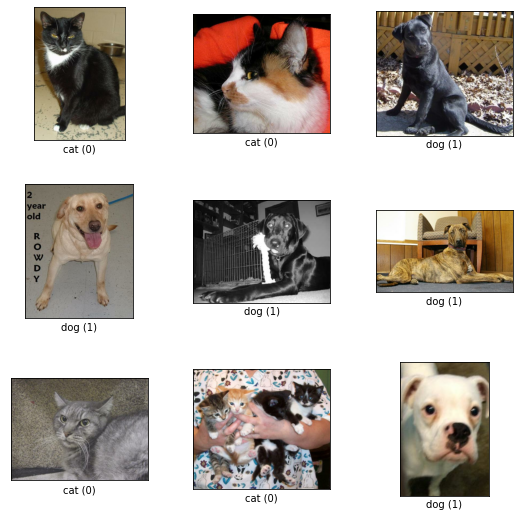

In [18]:
fig = tfds.show_examples(ds_train, ds_info)

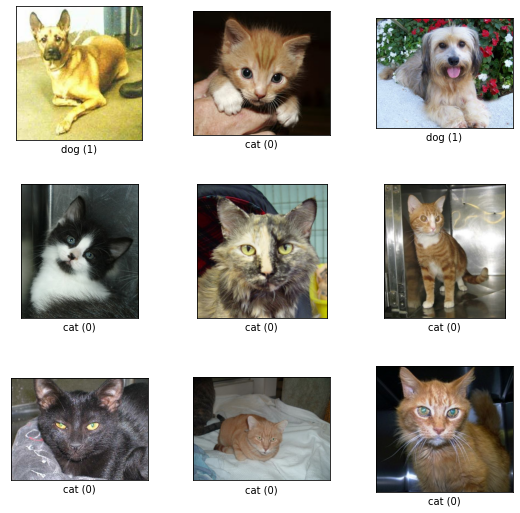

In [19]:
fig = tfds.show_examples(ds_test, ds_info)

### ResNet vs Plain

In [20]:
BATCH_SIZE = 32
EPOCH = 15

In [21]:
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

In [22]:
model_resnet_50 = build_resnet(input_shape=(224, 224, 3), 
                         num_classes=1, 
                         is_50=True,
                         activation='sigmoid')

model_resnet_50.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

history_resnet_50 = model_resnet_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/15


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 28/581 [>.............................] - ETA: 1:06 - loss: 6.4251 - accuracy: 0.5112

 38/581 [>.............................] - ETA: 1:04 - loss: 6.3444 - accuracy: 0.5304

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


114/581 [====>.........................] - ETA: 55s - loss: 6.0121 - accuracy: 0.5639

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


320/581 [===============>..............] - ETA: 31s - loss: 5.3718 - accuracy: 0.6057

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 30s - loss: 5.3430 - accuracy: 0.6068

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


344/581 [================>.............] - ETA: 28s - loss: 5.3037 - accuracy: 0.6100

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


372/581 [==================>...........] - ETA: 25s - loss: 5.2176 - accuracy: 0.6164

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


378/581 [==================>...........] - ETA: 24s - loss: 5.2007 - accuracy: 0.6174

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


578/581 [============================>.] - ETA: 0s - loss: 4.6550 - accuracy: 0.6444

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 4.6476 - accuracy: 0.6442

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 140s 156ms/step - loss: 4.6476 - accuracy: 0.6442 - val_loss: 3.2906 - val_accuracy: 0.6554
Epoch 2/15
 30/581 [>.............................] - ETA: 1:07 - loss: 3.1528 - accuracy: 0.6948

 38/581 [>.............................] - ETA: 1:06 - loss: 3.1427 - accuracy: 0.6908

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


115/581 [====>.........................] - ETA: 57s - loss: 3.0086 - accuracy: 0.7128

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


321/581 [===============>..............] - ETA: 32s - loss: 2.7138 - accuracy: 0.7164

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 31s - loss: 2.7009 - accuracy: 0.7167

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


344/581 [================>.............] - ETA: 29s - loss: 2.6838 - accuracy: 0.7178

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


371/581 [==================>...........] - ETA: 26s - loss: 2.6502 - accuracy: 0.7209

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


377/581 [==================>...........] - ETA: 25s - loss: 2.6427 - accuracy: 0.7211

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 2.4210 - accuracy: 0.7295

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 84s 145ms/step - loss: 2.4210 - accuracy: 0.7295 - val_loss: 2.0698 - val_accuracy: 0.5781
Epoch 3/15
  2/581 [..............................] - ETA: 1:10 - loss: 1.8902 - accuracy: 0.7656

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 35/581 [>.............................] - ETA: 1:06 - loss: 1.8765 - accuracy: 0.7116

 43/581 [=>............................] - ETA: 1:05 - loss: 1.8513 - accuracy: 0.7260

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


117/581 [=====>........................] - ETA: 56s - loss: 1.8000 - accuracy: 0.7316

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


326/581 [===============>..............] - ETA: 31s - loss: 1.6872 - accuracy: 0.7503

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


337/581 [================>.............] - ETA: 30s - loss: 1.6800 - accuracy: 0.7507

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


350/581 [=================>............] - ETA: 28s - loss: 1.6715 - accuracy: 0.7520

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


374/581 [==================>...........] - ETA: 25s - loss: 1.6583 - accuracy: 0.7534

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


380/581 [==================>...........] - ETA: 24s - loss: 1.6545 - accuracy: 0.7540

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


579/581 [============================>.] - ETA: 0s - loss: 1.5520 - accuracy: 0.7647

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.5514 - accuracy: 0.7643

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 142ms/step - loss: 1.5514 - accuracy: 0.7643 - val_loss: 2.0737 - val_accuracy: 0.5290
Epoch 4/15
 31/581 [>.............................] - ETA: 1:07 - loss: 1.2943 - accuracy: 0.7621

 42/581 [=>............................] - ETA: 1:05 - loss: 1.2871 - accuracy: 0.7738

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


114/581 [====>.........................] - ETA: 57s - loss: 1.2599 - accuracy: 0.7843

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


322/581 [===============>..............] - ETA: 32s - loss: 1.1893 - accuracy: 0.7968

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


335/581 [================>.............] - ETA: 30s - loss: 1.1852 - accuracy: 0.7973

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


346/581 [================>.............] - ETA: 29s - loss: 1.1811 - accuracy: 0.7987

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


373/581 [==================>...........] - ETA: 25s - loss: 1.1787 - accuracy: 0.7961

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


379/581 [==================>...........] - ETA: 24s - loss: 1.1772 - accuracy: 0.7962

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.1246 - accuracy: 0.8045

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 142ms/step - loss: 1.1246 - accuracy: 0.8045 - val_loss: 1.1962 - val_accuracy: 0.6797
Epoch 5/15
  1/581 [..............................] - ETA: 1:09 - loss: 1.0613 - accuracy: 0.7812

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 30/581 [>.............................] - ETA: 1:06 - loss: 1.0037 - accuracy: 0.8323

 42/581 [=>............................] - ETA: 1:05 - loss: 1.0217 - accuracy: 0.8162

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


115/581 [====>.........................] - ETA: 57s - loss: 0.9819 - accuracy: 0.8253

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


322/581 [===============>..............] - ETA: 32s - loss: 0.9363 - accuracy: 0.8293

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


335/581 [================>.............] - ETA: 30s - loss: 0.9348 - accuracy: 0.8291

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


348/581 [================>.............] - ETA: 28s - loss: 0.9300 - accuracy: 0.8305

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


375/581 [==================>...........] - ETA: 25s - loss: 0.9238 - accuracy: 0.8322

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 24s - loss: 0.9239 - accuracy: 0.8319

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.9032 - accuracy: 0.8330

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 142ms/step - loss: 0.9032 - accuracy: 0.8330 - val_loss: 77.7436 - val_accuracy: 0.5229
Epoch 6/15
  2/581 [..............................] - ETA: 1:10 - loss: 1.1399 - accuracy: 0.6875

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 33/581 [>.............................] - ETA: 1:07 - loss: 0.9506 - accuracy: 0.8040

 41/581 [=>............................] - ETA: 1:06 - loss: 0.9325 - accuracy: 0.8117

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


117/581 [=====>........................] - ETA: 57s - loss: 0.9070 - accuracy: 0.8154

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


324/581 [===============>..............] - ETA: 31s - loss: 0.8305 - accuracy: 0.8400

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


334/581 [================>.............] - ETA: 30s - loss: 0.8282 - accuracy: 0.8405

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


347/581 [================>.............] - ETA: 28s - loss: 0.8258 - accuracy: 0.8412

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


374/581 [==================>...........] - ETA: 25s - loss: 0.8268 - accuracy: 0.8403

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


380/581 [==================>...........] - ETA: 24s - loss: 0.8266 - accuracy: 0.8406

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.7944 - accuracy: 0.8466

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 142ms/step - loss: 0.7944 - accuracy: 0.8466 - val_loss: 79.0005 - val_accuracy: 0.4804
Epoch 7/15
  3/581 [..............................] - ETA: 1:09 - loss: 0.6483 - accuracy: 0.8958

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 34/581 [>.............................] - ETA: 1:06 - loss: 0.7225 - accuracy: 0.8631

 44/581 [=>............................] - ETA: 1:05 - loss: 0.7356 - accuracy: 0.8537

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


118/581 [=====>........................] - ETA: 56s - loss: 0.7052 - accuracy: 0.8647

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


323/581 [===============>..............] - ETA: 31s - loss: 0.7074 - accuracy: 0.8666

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


337/581 [================>.............] - ETA: 30s - loss: 0.7033 - accuracy: 0.8686

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


348/581 [================>.............] - ETA: 28s - loss: 0.6995 - accuracy: 0.8697

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


375/581 [==================>...........] - ETA: 25s - loss: 0.6970 - accuracy: 0.8702

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 24s - loss: 0.6971 - accuracy: 0.8697

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.6777 - accuracy: 0.8750

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 142ms/step - loss: 0.6777 - accuracy: 0.8750 - val_loss: 0.8446 - val_accuracy: 0.7768
Epoch 8/15
  3/581 [..............................] - ETA: 1:10 - loss: 0.6505 - accuracy: 0.8958

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 35/581 [>.............................] - ETA: 1:06 - loss: 0.5945 - accuracy: 0.8964

 44/581 [=>............................] - ETA: 1:05 - loss: 0.5943 - accuracy: 0.8935

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


118/581 [=====>........................] - ETA: 56s - loss: 0.6125 - accuracy: 0.8906

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


326/581 [===============>..............] - ETA: 31s - loss: 0.6038 - accuracy: 0.8863

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


337/581 [================>.............] - ETA: 30s - loss: 0.6024 - accuracy: 0.8871

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


348/581 [================>.............] - ETA: 28s - loss: 0.6013 - accuracy: 0.8875

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


375/581 [==================>...........] - ETA: 25s - loss: 0.5969 - accuracy: 0.8885

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 24s - loss: 0.5957 - accuracy: 0.8886

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.5816 - accuracy: 0.8914

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 142ms/step - loss: 0.5816 - accuracy: 0.8914 - val_loss: 0.6327 - val_accuracy: 0.8571
Epoch 9/15
  2/581 [..............................] - ETA: 1:10 - loss: 0.4856 - accuracy: 0.9219

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 34/581 [>.............................] - ETA: 1:06 - loss: 0.5275 - accuracy: 0.9145

 47/581 [=>............................] - ETA: 1:05 - loss: 0.5250 - accuracy: 0.9109

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


120/581 [=====>........................] - ETA: 56s - loss: 0.5544 - accuracy: 0.8994

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


326/581 [===============>..............] - ETA: 31s - loss: 0.5571 - accuracy: 0.8930

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


340/581 [================>.............] - ETA: 29s - loss: 0.5534 - accuracy: 0.8944

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


350/581 [=================>............] - ETA: 28s - loss: 0.5522 - accuracy: 0.8949

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


377/581 [==================>...........] - ETA: 25s - loss: 0.5483 - accuracy: 0.8965

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


383/581 [==================>...........] - ETA: 24s - loss: 0.5482 - accuracy: 0.8967

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.5398 - accuracy: 0.8992

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 142ms/step - loss: 0.5398 - accuracy: 0.8992 - val_loss: 0.6582 - val_accuracy: 0.8264
Epoch 10/15
  6/581 [..............................] - ETA: 1:10 - loss: 0.6587 - accuracy: 0.8490

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 37/581 [>.............................] - ETA: 1:06 - loss: 0.6871 - accuracy: 0.8708

 47/581 [=>............................] - ETA: 1:05 - loss: 0.6880 - accuracy: 0.8717

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


120/581 [=====>........................] - ETA: 56s - loss: 0.6354 - accuracy: 0.8865

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


326/581 [===============>..............] - ETA: 31s - loss: 0.5678 - accuracy: 0.8964

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


340/581 [================>.............] - ETA: 29s - loss: 0.5636 - accuracy: 0.8974

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


351/581 [=================>............] - ETA: 28s - loss: 0.5604 - accuracy: 0.8980

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


378/581 [==================>...........] - ETA: 25s - loss: 0.5549 - accuracy: 0.8991

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


384/581 [==================>...........] - ETA: 24s - loss: 0.5538 - accuracy: 0.8991

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.5345 - accuracy: 0.9019

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 141ms/step - loss: 0.5345 - accuracy: 0.9019 - val_loss: 0.8537 - val_accuracy: 0.7643
Epoch 11/15
  7/581 [..............................] - ETA: 1:09 - loss: 0.4806 - accuracy: 0.8929

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 36/581 [>.............................] - ETA: 1:05 - loss: 0.4976 - accuracy: 0.9016

 47/581 [=>............................] - ETA: 1:04 - loss: 0.5027 - accuracy: 0.9034

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


121/581 [=====>........................] - ETA: 56s - loss: 0.5158 - accuracy: 0.8981

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


329/581 [===============>..............] - ETA: 31s - loss: 0.4954 - accuracy: 0.9059

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


339/581 [================>.............] - ETA: 29s - loss: 0.4964 - accuracy: 0.9064

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


352/581 [=================>............] - ETA: 28s - loss: 0.4972 - accuracy: 0.9064

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


379/581 [==================>...........] - ETA: 24s - loss: 0.5013 - accuracy: 0.9050

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


385/581 [==================>...........] - ETA: 24s - loss: 0.5024 - accuracy: 0.9047

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.4900 - accuracy: 0.9079

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 141ms/step - loss: 0.4900 - accuracy: 0.9079 - val_loss: 0.5427 - val_accuracy: 0.8841
Epoch 12/15
  5/581 [..............................] - ETA: 1:10 - loss: 0.4433 - accuracy: 0.9187

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 38/581 [>.............................] - ETA: 1:06 - loss: 0.4831 - accuracy: 0.9137

 48/581 [=>............................] - ETA: 1:04 - loss: 0.4817 - accuracy: 0.9115

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


122/581 [=====>........................] - ETA: 56s - loss: 0.4699 - accuracy: 0.9106

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


330/581 [================>.............] - ETA: 30s - loss: 0.4677 - accuracy: 0.9146

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


341/581 [================>.............] - ETA: 29s - loss: 0.4678 - accuracy: 0.9147

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


354/581 [=================>............] - ETA: 28s - loss: 0.4668 - accuracy: 0.9150

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 24s - loss: 0.4675 - accuracy: 0.9141

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


387/581 [==================>...........] - ETA: 23s - loss: 0.4671 - accuracy: 0.9141

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.4594 - accuracy: 0.9136

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 141ms/step - loss: 0.4594 - accuracy: 0.9136 - val_loss: 0.5447 - val_accuracy: 0.8723
Epoch 13/15
  8/581 [..............................] - ETA: 1:10 - loss: 0.3743 - accuracy: 0.9492

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 38/581 [>.............................] - ETA: 1:05 - loss: 0.4261 - accuracy: 0.9226

 50/581 [=>............................] - ETA: 1:04 - loss: 0.4323 - accuracy: 0.9199

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


125/581 [=====>........................] - ETA: 55s - loss: 0.4361 - accuracy: 0.9197

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


330/581 [================>.............] - ETA: 30s - loss: 0.4289 - accuracy: 0.9222

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


343/581 [================>.............] - ETA: 29s - loss: 0.4325 - accuracy: 0.9209

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


355/581 [=================>............] - ETA: 27s - loss: 0.4324 - accuracy: 0.9213

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


382/581 [==================>...........] - ETA: 24s - loss: 0.4341 - accuracy: 0.9211

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


388/581 [===================>..........] - ETA: 23s - loss: 0.4350 - accuracy: 0.9208

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.4403 - accuracy: 0.9220

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 141ms/step - loss: 0.4403 - accuracy: 0.9220 - val_loss: 0.5892 - val_accuracy: 0.8489
Epoch 14/15
 10/581 [..............................] - ETA: 1:10 - loss: 0.3573 - accuracy: 0.9438

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 42/581 [=>............................] - ETA: 1:05 - loss: 0.4490 - accuracy: 0.9308

 49/581 [=>............................] - ETA: 1:04 - loss: 0.4612 - accuracy: 0.9260

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


125/581 [=====>........................] - ETA: 55s - loss: 0.4603 - accuracy: 0.9275

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 30s - loss: 0.4329 - accuracy: 0.9265

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


342/581 [================>.............] - ETA: 29s - loss: 0.4339 - accuracy: 0.9258

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


355/581 [=================>............] - ETA: 27s - loss: 0.4330 - accuracy: 0.9257

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


382/581 [==================>...........] - ETA: 24s - loss: 0.4295 - accuracy: 0.9268

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


388/581 [===================>..........] - ETA: 23s - loss: 0.4295 - accuracy: 0.9266

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.4301 - accuracy: 0.9285

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 141ms/step - loss: 0.4301 - accuracy: 0.9285 - val_loss: 1.0558 - val_accuracy: 0.6621
Epoch 15/15
  9/581 [..............................] - ETA: 1:09 - loss: 0.4446 - accuracy: 0.9236

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 39/581 [=>............................] - ETA: 1:05 - loss: 0.4053 - accuracy: 0.9383

 52/581 [=>............................] - ETA: 1:04 - loss: 0.4028 - accuracy: 0.9363

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


126/581 [=====>........................] - ETA: 55s - loss: 0.4158 - accuracy: 0.9286

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


334/581 [================>.............] - ETA: 30s - loss: 0.4018 - accuracy: 0.9288

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


344/581 [================>.............] - ETA: 29s - loss: 0.4004 - accuracy: 0.9293

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


357/581 [=================>............] - ETA: 27s - loss: 0.4016 - accuracy: 0.9291

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


384/581 [==================>...........] - ETA: 24s - loss: 0.4017 - accuracy: 0.9294

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


390/581 [===================>..........] - ETA: 23s - loss: 0.4012 - accuracy: 0.9297

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.3953 - accuracy: 0.9321

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 82s 141ms/step - loss: 0.3953 - accuracy: 0.9321 - val_loss: 0.5848 - val_accuracy: 0.8532


In [23]:
model_resnet_34 = build_resnet(input_shape=(224, 224, 3),                                
                               num_classes=1, 
                               is_50=False, 
                               activation='sigmoid', 
                               name='ResNet_34')

model_resnet_34.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

history_resnet_34 = model_resnet_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True
)

Epoch 1/15


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 29/581 [>.............................] - ETA: 1:40 - loss: 3.0672 - accuracy: 0.4881

 38/581 [>.............................] - ETA: 1:38 - loss: 2.9267 - accuracy: 0.4975

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


112/581 [====>.........................] - ETA: 1:26 - loss: 2.5816 - accuracy: 0.5672

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


320/581 [===============>..............] - ETA: 48s - loss: 2.3254 - accuracy: 0.6179

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 46s - loss: 2.3150 - accuracy: 0.6210

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


344/581 [================>.............] - ETA: 43s - loss: 2.3029 - accuracy: 0.6239

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


371/581 [==================>...........] - ETA: 38s - loss: 2.2783 - accuracy: 0.6286

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


377/581 [==================>...........] - ETA: 37s - loss: 2.2726 - accuracy: 0.6301

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 2.0979 - accuracy: 0.6557

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 133s 208ms/step - loss: 2.0979 - accuracy: 0.6557 - val_loss: 1.8036 - val_accuracy: 0.6226
Epoch 2/15
  1/581 [..............................] - ETA: 1:45 - loss: 1.6193 - accuracy: 0.6562

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 23/581 [>.............................] - ETA: 1:42 - loss: 1.6147 - accuracy: 0.7201

 41/581 [=>............................] - ETA: 1:38 - loss: 1.6007 - accuracy: 0.7264

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


116/581 [====>.........................] - ETA: 1:25 - loss: 1.5418 - accuracy: 0.7395

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


322/581 [===============>..............] - ETA: 47s - loss: 1.4251 - accuracy: 0.7467

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


333/581 [================>.............] - ETA: 45s - loss: 1.4208 - accuracy: 0.7462

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


345/581 [================>.............] - ETA: 43s - loss: 1.4136 - accuracy: 0.7476

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


372/581 [==================>...........] - ETA: 38s - loss: 1.3964 - accuracy: 0.7509

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


378/581 [==================>...........] - ETA: 37s - loss: 1.3944 - accuracy: 0.7505

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.3029 - accuracy: 0.7521

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 121s 208ms/step - loss: 1.3029 - accuracy: 0.7521 - val_loss: 1.2056 - val_accuracy: 0.6358
Epoch 3/15
  1/581 [..............................] - ETA: 1:43 - loss: 1.0701 - accuracy: 0.6875

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 30/581 [>.............................] - ETA: 1:39 - loss: 1.0879 - accuracy: 0.7347

 40/581 [=>............................] - ETA: 1:37 - loss: 1.0775 - accuracy: 0.7409

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


114/581 [====>.........................] - ETA: 1:25 - loss: 1.0175 - accuracy: 0.7719

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


320/581 [===============>..............] - ETA: 47s - loss: 0.9431 - accuracy: 0.7856

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


333/581 [================>.............] - ETA: 45s - loss: 0.9375 - accuracy: 0.7880

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


346/581 [================>.............] - ETA: 42s - loss: 0.9326 - accuracy: 0.7897

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


373/581 [==================>...........] - ETA: 37s - loss: 0.9253 - accuracy: 0.7908

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


379/581 [==================>...........] - ETA: 36s - loss: 0.9234 - accuracy: 0.7916

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.8814 - accuracy: 0.7966

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 120s 206ms/step - loss: 0.8814 - accuracy: 0.7966 - val_loss: 1.2966 - val_accuracy: 0.6459
Epoch 4/15
  3/581 [..............................] - ETA: 1:44 - loss: 0.7919 - accuracy: 0.7292

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/581 [>.............................] - ETA: 1:41 - loss: 0.7638 - accuracy: 0.8075

 45/581 [=>............................] - ETA: 1:37 - loss: 0.7299 - accuracy: 0.8264

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


115/581 [====>.........................] - ETA: 1:25 - loss: 0.7304 - accuracy: 0.8204

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


324/581 [===============>..............] - ETA: 46s - loss: 0.6965 - accuracy: 0.8288

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


337/581 [================>.............] - ETA: 44s - loss: 0.6930 - accuracy: 0.8291

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


347/581 [================>.............] - ETA: 42s - loss: 0.6935 - accuracy: 0.8281

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


374/581 [==================>...........] - ETA: 37s - loss: 0.6897 - accuracy: 0.8286

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


380/581 [==================>...........] - ETA: 36s - loss: 0.6880 - accuracy: 0.8290

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.6646 - accuracy: 0.8327

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 120s 206ms/step - loss: 0.6646 - accuracy: 0.8327 - val_loss: 1.4186 - val_accuracy: 0.6200
Epoch 5/15
 32/581 [>.............................] - ETA: 1:39 - loss: 0.6277 - accuracy: 0.8320

 41/581 [=>............................] - ETA: 1:38 - loss: 0.6410 - accuracy: 0.8232

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


116/581 [====>.........................] - ETA: 1:24 - loss: 0.6145 - accuracy: 0.8380

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


326/581 [===============>..............] - ETA: 46s - loss: 0.5803 - accuracy: 0.8529

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


334/581 [================>.............] - ETA: 45s - loss: 0.5793 - accuracy: 0.8539

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


348/581 [================>.............] - ETA: 42s - loss: 0.5807 - accuracy: 0.8525

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


375/581 [==================>...........] - ETA: 37s - loss: 0.5785 - accuracy: 0.8534

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 36s - loss: 0.5788 - accuracy: 0.8535

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.5671 - accuracy: 0.8561

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 121s 208ms/step - loss: 0.5671 - accuracy: 0.8561 - val_loss: 0.7196 - val_accuracy: 0.7509
Epoch 6/15
  1/581 [..............................] - ETA: 1:45 - loss: 0.5561 - accuracy: 0.8750

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 34/581 [>.............................] - ETA: 1:40 - loss: 0.4808 - accuracy: 0.8888

 44/581 [=>............................] - ETA: 1:38 - loss: 0.4873 - accuracy: 0.8849

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


116/581 [====>.........................] - ETA: 1:25 - loss: 0.4904 - accuracy: 0.8839

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


326/581 [===============>..............] - ETA: 46s - loss: 0.4991 - accuracy: 0.8741

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


337/581 [================>.............] - ETA: 44s - loss: 0.4988 - accuracy: 0.8744

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


348/581 [================>.............] - ETA: 42s - loss: 0.4982 - accuracy: 0.8746

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


375/581 [==================>...........] - ETA: 37s - loss: 0.4966 - accuracy: 0.8749

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 36s - loss: 0.4956 - accuracy: 0.8756

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.4839 - accuracy: 0.8787

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 120s 206ms/step - loss: 0.4839 - accuracy: 0.8787 - val_loss: 0.6241 - val_accuracy: 0.7830
Epoch 7/15
  5/581 [..............................] - ETA: 1:44 - loss: 0.4713 - accuracy: 0.8687

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 30/581 [>.............................] - ETA: 1:40 - loss: 0.4542 - accuracy: 0.8865

 48/581 [=>............................] - ETA: 1:37 - loss: 0.4552 - accuracy: 0.8919

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


117/581 [=====>........................] - ETA: 1:24 - loss: 0.4497 - accuracy: 0.8902

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


325/581 [===============>..............] - ETA: 46s - loss: 0.4416 - accuracy: 0.8942

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


340/581 [================>.............] - ETA: 43s - loss: 0.4411 - accuracy: 0.8943

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


347/581 [================>.............] - ETA: 42s - loss: 0.4415 - accuracy: 0.8943

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


374/581 [==================>...........] - ETA: 37s - loss: 0.4418 - accuracy: 0.8945

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


380/581 [==================>...........] - ETA: 36s - loss: 0.4422 - accuracy: 0.8944

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.4373 - accuracy: 0.8953

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 120s 206ms/step - loss: 0.4373 - accuracy: 0.8953 - val_loss: 0.4570 - val_accuracy: 0.8870
Epoch 8/15
  7/581 [..............................] - ETA: 1:44 - loss: 0.4236 - accuracy: 0.8884

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 29/581 [>.............................] - ETA: 1:40 - loss: 0.4045 - accuracy: 0.9062

 49/581 [=>............................] - ETA: 1:37 - loss: 0.4173 - accuracy: 0.8992

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


121/581 [=====>........................] - ETA: 1:24 - loss: 0.4033 - accuracy: 0.9064

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


327/581 [===============>..............] - ETA: 46s - loss: 0.4269 - accuracy: 0.8972

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


340/581 [================>.............] - ETA: 43s - loss: 0.4258 - accuracy: 0.8977

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


351/581 [=================>............] - ETA: 41s - loss: 0.4241 - accuracy: 0.8983

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


378/581 [==================>...........] - ETA: 37s - loss: 0.4213 - accuracy: 0.8989

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


384/581 [==================>...........] - ETA: 35s - loss: 0.4210 - accuracy: 0.8992

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.4105 - accuracy: 0.9017

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 120s 206ms/step - loss: 0.4105 - accuracy: 0.9017 - val_loss: 1.4110 - val_accuracy: 0.6470
Epoch 9/15
  5/581 [..............................] - ETA: 1:44 - loss: 0.3505 - accuracy: 0.9187

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 34/581 [>.............................] - ETA: 1:39 - loss: 0.3919 - accuracy: 0.9072

 46/581 [=>............................] - ETA: 1:37 - loss: 0.3996 - accuracy: 0.9022

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


122/581 [=====>........................] - ETA: 1:23 - loss: 0.4100 - accuracy: 0.9078

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


329/581 [===============>..............] - ETA: 45s - loss: 0.3996 - accuracy: 0.9100

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


338/581 [================>.............] - ETA: 44s - loss: 0.3998 - accuracy: 0.9091

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


354/581 [=================>............] - ETA: 41s - loss: 0.3991 - accuracy: 0.9091

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 36s - loss: 0.3972 - accuracy: 0.9093

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


387/581 [==================>...........] - ETA: 35s - loss: 0.3963 - accuracy: 0.9096

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.3965 - accuracy: 0.9086

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 120s 206ms/step - loss: 0.3965 - accuracy: 0.9086 - val_loss: 1.0281 - val_accuracy: 0.6236
Epoch 10/15
  8/581 [..............................] - ETA: 2:06 - loss: 0.3964 - accuracy: 0.9256

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 24/581 [>.............................] - ETA: 1:48 - loss: 0.3798 - accuracy: 0.9164

 49/581 [=>............................] - ETA: 1:40 - loss: 0.3614 - accuracy: 0.9208

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


121/581 [=====>........................] - ETA: 1:25 - loss: 0.3710 - accuracy: 0.9181

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


330/581 [================>.............] - ETA: 45s - loss: 0.3811 - accuracy: 0.9131

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


339/581 [================>.............] - ETA: 44s - loss: 0.3802 - accuracy: 0.9138

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


354/581 [=================>............] - ETA: 41s - loss: 0.3817 - accuracy: 0.9143

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 36s - loss: 0.3808 - accuracy: 0.9149

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


387/581 [==================>...........] - ETA: 35s - loss: 0.3810 - accuracy: 0.9150

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.3741 - accuracy: 0.9170

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 121s 208ms/step - loss: 0.3741 - accuracy: 0.9170 - val_loss: 2.4727 - val_accuracy: 0.5372
Epoch 11/15
 10/581 [..............................] - ETA: 1:43 - loss: 0.3623 - accuracy: 0.9219

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 19/581 [..............................] - ETA: 1:42 - loss: 0.3787 - accuracy: 0.9095

 51/581 [=>............................] - ETA: 1:36 - loss: 0.3744 - accuracy: 0.9112

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


122/581 [=====>........................] - ETA: 1:23 - loss: 0.3576 - accuracy: 0.9193

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 45s - loss: 0.3682 - accuracy: 0.9185

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


342/581 [================>.............] - ETA: 43s - loss: 0.3681 - accuracy: 0.9185

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


354/581 [=================>............] - ETA: 41s - loss: 0.3669 - accuracy: 0.9190

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


382/581 [==================>...........] - ETA: 36s - loss: 0.3672 - accuracy: 0.9190

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


388/581 [===================>..........] - ETA: 35s - loss: 0.3674 - accuracy: 0.9188

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.3634 - accuracy: 0.9213

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 122s 210ms/step - loss: 0.3634 - accuracy: 0.9213 - val_loss: 0.7057 - val_accuracy: 0.7048
Epoch 12/15
  8/581 [..............................] - ETA: 1:44 - loss: 0.4000 - accuracy: 0.9102

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 23/581 [>.............................] - ETA: 1:41 - loss: 0.3518 - accuracy: 0.9226

 53/581 [=>............................] - ETA: 1:36 - loss: 0.3345 - accuracy: 0.9304

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


124/581 [=====>........................] - ETA: 1:23 - loss: 0.3460 - accuracy: 0.9249

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


330/581 [================>.............] - ETA: 45s - loss: 0.3334 - accuracy: 0.9298

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


344/581 [================>.............] - ETA: 43s - loss: 0.3349 - accuracy: 0.9298

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


354/581 [=================>............] - ETA: 41s - loss: 0.3345 - accuracy: 0.9296

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 36s - loss: 0.3332 - accuracy: 0.9299

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


387/581 [==================>...........] - ETA: 35s - loss: 0.3328 - accuracy: 0.9302

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.3390 - accuracy: 0.9293

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 120s 206ms/step - loss: 0.3390 - accuracy: 0.9293 - val_loss: 1.3823 - val_accuracy: 0.8262
Epoch 13/15
 13/581 [..............................] - ETA: 1:43 - loss: 0.3615 - accuracy: 0.9447

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 24/581 [>.............................] - ETA: 1:41 - loss: 0.3545 - accuracy: 0.9466

 52/581 [=>............................] - ETA: 1:36 - loss: 0.3738 - accuracy: 0.9321

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


125/581 [=====>........................] - ETA: 1:24 - loss: 0.3586 - accuracy: 0.9275

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


332/581 [================>.............] - ETA: 45s - loss: 0.3484 - accuracy: 0.9291

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


343/581 [================>.............] - ETA: 43s - loss: 0.3458 - accuracy: 0.9302

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


357/581 [=================>............] - ETA: 40s - loss: 0.3448 - accuracy: 0.9309

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


385/581 [==================>...........] - ETA: 35s - loss: 0.3449 - accuracy: 0.9301

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


391/581 [===================>..........] - ETA: 34s - loss: 0.3447 - accuracy: 0.9299

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.3365 - accuracy: 0.9321

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 120s 206ms/step - loss: 0.3365 - accuracy: 0.9321 - val_loss: 0.4565 - val_accuracy: 0.8710
Epoch 14/15
 13/581 [..............................] - ETA: 1:42 - loss: 0.3228 - accuracy: 0.9375

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 26/581 [>.............................] - ETA: 1:40 - loss: 0.3228 - accuracy: 0.9351

 52/581 [=>............................] - ETA: 1:36 - loss: 0.3335 - accuracy: 0.9321

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


125/581 [=====>........................] - ETA: 1:23 - loss: 0.3495 - accuracy: 0.9262

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


332/581 [================>.............] - ETA: 45s - loss: 0.3373 - accuracy: 0.9290

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


342/581 [================>.............] - ETA: 43s - loss: 0.3385 - accuracy: 0.9286

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


358/581 [=================>............] - ETA: 40s - loss: 0.3398 - accuracy: 0.9277

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


385/581 [==================>...........] - ETA: 35s - loss: 0.3380 - accuracy: 0.9284

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


391/581 [===================>..........] - ETA: 34s - loss: 0.3386 - accuracy: 0.9283

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.3299 - accuracy: 0.9323

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 120s 207ms/step - loss: 0.3299 - accuracy: 0.9323 - val_loss: 0.6453 - val_accuracy: 0.7775
Epoch 15/15
 14/581 [..............................] - ETA: 1:43 - loss: 0.2935 - accuracy: 0.9509

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 26/581 [>.............................] - ETA: 1:40 - loss: 0.3042 - accuracy: 0.9459

 56/581 [=>............................] - ETA: 1:35 - loss: 0.3062 - accuracy: 0.9375

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


127/581 [=====>........................] - ETA: 1:22 - loss: 0.3104 - accuracy: 0.9395

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


335/581 [================>.............] - ETA: 44s - loss: 0.3182 - accuracy: 0.9359

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


347/581 [================>.............] - ETA: 42s - loss: 0.3177 - accuracy: 0.9358

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


357/581 [=================>............] - ETA: 40s - loss: 0.3174 - accuracy: 0.9358

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


384/581 [==================>...........] - ETA: 35s - loss: 0.3171 - accuracy: 0.9364

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


390/581 [===================>..........] - ETA: 34s - loss: 0.3159 - accuracy: 0.9368

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.3126 - accuracy: 0.9379

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 120s 206ms/step - loss: 0.3126 - accuracy: 0.9379 - val_loss: 0.4362 - val_accuracy: 0.8793


In [24]:
model_plain_50 = build_plainnet(input_shape=(224, 224, 3), 
                          num_classes=1, 
                          is_50=True,
                          activation='sigmoid')

model_plain_50.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

history_plain_50 = model_plain_50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)


Epoch 1/15


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 28/581 [>.............................] - ETA: 2:33 - loss: 5.3203 - accuracy: 0.5335

 38/581 [>.............................] - ETA: 2:30 - loss: 5.2622 - accuracy: 0.5189

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


113/581 [====>.........................] - ETA: 2:12 - loss: 4.8775 - accuracy: 0.5014

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


318/581 [===============>..............] - ETA: 1:13 - loss: 4.0749 - accuracy: 0.4965

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 1:09 - loss: 4.0365 - accuracy: 0.4982

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


343/581 [================>.............] - ETA: 1:06 - loss: 4.0024 - accuracy: 0.4993

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


371/581 [==================>...........] - ETA: 58s - loss: 3.9262 - accuracy: 0.5012

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


377/581 [==================>...........] - ETA: 56s - loss: 3.9105 - accuracy: 0.5008

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


576/581 [============================>.] - ETA: 1s - loss: 3.4846 - accuracy: 0.5110

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 3.4766 - accuracy: 0.5110

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 196s 313ms/step - loss: 3.4766 - accuracy: 0.5110 - val_loss: 2.4574 - val_accuracy: 0.4883
Epoch 2/15
 28/581 [>.............................] - ETA: 2:34 - loss: 2.4221 - accuracy: 0.5435

 41/581 [=>............................] - ETA: 2:30 - loss: 2.4079 - accuracy: 0.5518

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


114/581 [====>.........................] - ETA: 2:10 - loss: 2.3707 - accuracy: 0.5329

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


314/581 [===============>..............] - ETA: 1:13 - loss: 2.2387 - accuracy: 0.5152

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


334/581 [================>.............] - ETA: 1:08 - loss: 2.2272 - accuracy: 0.5138

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


341/581 [================>.............] - ETA: 1:06 - loss: 2.2233 - accuracy: 0.5131

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


369/581 [==================>...........] - ETA: 58s - loss: 2.2078 - accuracy: 0.5130

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


375/581 [==================>...........] - ETA: 57s - loss: 2.2044 - accuracy: 0.5136

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 2.0987 - accuracy: 0.5140

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 178s 306ms/step - loss: 2.0987 - accuracy: 0.5140 - val_loss: 1.8753 - val_accuracy: 0.5155
Epoch 3/15


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 15/581 [..............................] - ETA: 2:36 - loss: 1.8448 - accuracy: 0.4792

 41/581 [=>............................] - ETA: 2:29 - loss: 1.8367 - accuracy: 0.4962

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


113/581 [====>.........................] - ETA: 2:09 - loss: 1.8074 - accuracy: 0.4959

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


318/581 [===============>..............] - ETA: 1:12 - loss: 1.7731 - accuracy: 0.5071

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


332/581 [================>.............] - ETA: 1:08 - loss: 1.7700 - accuracy: 0.5071

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


343/581 [================>.............] - ETA: 1:05 - loss: 1.7673 - accuracy: 0.5078

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


370/581 [==================>...........] - ETA: 58s - loss: 1.7611 - accuracy: 0.5088

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


376/581 [==================>...........] - ETA: 56s - loss: 1.7596 - accuracy: 0.5083

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.7016 - accuracy: 0.5158

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 178s 306ms/step - loss: 1.7016 - accuracy: 0.5158 - val_loss: 1.5395 - val_accuracy: 0.5037
Epoch 4/15


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 29/581 [>.............................] - ETA: 2:31 - loss: 1.5071 - accuracy: 0.5679

 37/581 [>.............................] - ETA: 2:29 - loss: 1.5124 - accuracy: 0.5709

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


114/581 [====>.........................] - ETA: 2:09 - loss: 1.5227 - accuracy: 0.5463

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


322/581 [===============>..............] - ETA: 1:11 - loss: 1.4794 - accuracy: 0.5420

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


330/581 [================>.............] - ETA: 1:09 - loss: 1.4780 - accuracy: 0.5413

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


344/581 [================>.............] - ETA: 1:05 - loss: 1.4750 - accuracy: 0.5424

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


371/581 [==================>...........] - ETA: 57s - loss: 1.4699 - accuracy: 0.5441

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


377/581 [==================>...........] - ETA: 56s - loss: 1.4691 - accuracy: 0.5437

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.4371 - accuracy: 0.5460

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 177s 305ms/step - loss: 1.4371 - accuracy: 0.5460 - val_loss: 1.3543 - val_accuracy: 0.5017
Epoch 5/15


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 19/581 [..............................] - ETA: 2:34 - loss: 1.3454 - accuracy: 0.5872

 42/581 [=>............................] - ETA: 2:28 - loss: 1.3427 - accuracy: 0.5573

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


114/581 [====>.........................] - ETA: 2:08 - loss: 1.3339 - accuracy: 0.5515

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


322/581 [===============>..............] - ETA: 1:11 - loss: 1.3144 - accuracy: 0.5541

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


333/581 [================>.............] - ETA: 1:08 - loss: 1.3146 - accuracy: 0.5548

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


347/581 [================>.............] - ETA: 1:04 - loss: 1.3157 - accuracy: 0.5530

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


374/581 [==================>...........] - ETA: 56s - loss: 1.3157 - accuracy: 0.5521

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


380/581 [==================>...........] - ETA: 55s - loss: 1.3152 - accuracy: 0.5518

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.2983 - accuracy: 0.5572

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 177s 305ms/step - loss: 1.2983 - accuracy: 0.5572 - val_loss: 1.9412 - val_accuracy: 0.4832
Epoch 6/15
  2/581 [..............................] - ETA: 2:37 - loss: 1.2791 - accuracy: 0.4844

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 31/581 [>.............................] - ETA: 2:29 - loss: 1.2417 - accuracy: 0.5348

 39/581 [=>............................] - ETA: 2:28 - loss: 1.2442 - accuracy: 0.5397

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


117/581 [=====>........................] - ETA: 2:07 - loss: 1.2420 - accuracy: 0.5410

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


323/581 [===============>..............] - ETA: 1:10 - loss: 1.2326 - accuracy: 0.5324

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


332/581 [================>.............] - ETA: 1:08 - loss: 1.2351 - accuracy: 0.5320

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


343/581 [================>.............] - ETA: 1:05 - loss: 1.2375 - accuracy: 0.5297

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


370/581 [==================>...........] - ETA: 58s - loss: 1.2412 - accuracy: 0.5297

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


376/581 [==================>...........] - ETA: 56s - loss: 1.2417 - accuracy: 0.5298

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.2323 - accuracy: 0.5431

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 177s 306ms/step - loss: 1.2323 - accuracy: 0.5431 - val_loss: 1.1862 - val_accuracy: 0.4897
Epoch 7/15
  4/581 [..............................] - ETA: 2:38 - loss: 1.1303 - accuracy: 0.5859

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 22/581 [>.............................] - ETA: 2:34 - loss: 1.1425 - accuracy: 0.5611

 42/581 [=>............................] - ETA: 2:28 - loss: 1.1388 - accuracy: 0.5781

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


117/581 [=====>........................] - ETA: 2:08 - loss: 1.1503 - accuracy: 0.5475

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


323/581 [===============>..............] - ETA: 1:10 - loss: 1.1798 - accuracy: 0.5194

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


333/581 [================>.............] - ETA: 1:08 - loss: 1.1806 - accuracy: 0.5195

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


347/581 [================>.............] - ETA: 1:04 - loss: 1.1822 - accuracy: 0.5200

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


374/581 [==================>...........] - ETA: 56s - loss: 1.1827 - accuracy: 0.5242

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


380/581 [==================>...........] - ETA: 55s - loss: 1.1827 - accuracy: 0.5233

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.1666 - accuracy: 0.5306

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 177s 305ms/step - loss: 1.1666 - accuracy: 0.5306 - val_loss: 1.1021 - val_accuracy: 0.4918
Epoch 8/15
  5/581 [..............................] - ETA: 2:38 - loss: 1.0566 - accuracy: 0.6125

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 34/581 [>.............................] - ETA: 2:31 - loss: 1.1003 - accuracy: 0.5496

 46/581 [=>............................] - ETA: 2:28 - loss: 1.1119 - accuracy: 0.5353

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


120/581 [=====>........................] - ETA: 2:07 - loss: 1.1158 - accuracy: 0.5247

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


316/581 [===============>..............] - ETA: 1:12 - loss: 1.0868 - accuracy: 0.5077

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


339/581 [================>.............] - ETA: 1:06 - loss: 1.0875 - accuracy: 0.5078

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


347/581 [================>.............] - ETA: 1:04 - loss: 1.0874 - accuracy: 0.5082

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


374/581 [==================>...........] - ETA: 57s - loss: 1.0865 - accuracy: 0.5058

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


379/581 [==================>...........] - ETA: 55s - loss: 1.0861 - accuracy: 0.5064

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.0812 - accuracy: 0.5075

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 178s 306ms/step - loss: 1.0812 - accuracy: 0.5075 - val_loss: 1.1248 - val_accuracy: 0.4976
Epoch 9/15
  6/581 [..............................] - ETA: 2:38 - loss: 1.1310 - accuracy: 0.5365

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 21/581 [>.............................] - ETA: 2:31 - loss: 1.1442 - accuracy: 0.5410

 47/581 [=>............................] - ETA: 2:27 - loss: 1.1471 - accuracy: 0.5302

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


118/581 [=====>........................] - ETA: 2:08 - loss: 1.1429 - accuracy: 0.5181

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


327/581 [===============>..............] - ETA: 1:10 - loss: 1.1077 - accuracy: 0.5122

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


338/581 [================>.............] - ETA: 1:06 - loss: 1.1070 - accuracy: 0.5135

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


348/581 [================>.............] - ETA: 1:04 - loss: 1.1072 - accuracy: 0.5127

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


375/581 [==================>...........] - ETA: 56s - loss: 1.1048 - accuracy: 0.5142

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 55s - loss: 1.1039 - accuracy: 0.5147

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.0947 - accuracy: 0.5148

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 177s 305ms/step - loss: 1.0947 - accuracy: 0.5148 - val_loss: 7.0318 - val_accuracy: 0.4872
Epoch 10/15
  6/581 [..............................] - ETA: 2:38 - loss: 1.1116 - accuracy: 0.5729

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 22/581 [>.............................] - ETA: 2:34 - loss: 1.1035 - accuracy: 0.5256

 49/581 [=>............................] - ETA: 2:27 - loss: 1.0938 - accuracy: 0.5281

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


120/581 [=====>........................] - ETA: 2:07 - loss: 1.0715 - accuracy: 0.5107

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


328/581 [===============>..............] - ETA: 1:09 - loss: 1.0651 - accuracy: 0.5109

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


339/581 [================>.............] - ETA: 1:06 - loss: 1.0637 - accuracy: 0.5105

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


350/581 [=================>............] - ETA: 1:03 - loss: 1.0622 - accuracy: 0.5103

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


377/581 [==================>...........] - ETA: 56s - loss: 1.0577 - accuracy: 0.5082

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


383/581 [==================>...........] - ETA: 54s - loss: 1.0567 - accuracy: 0.5074

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


572/581 [============================>.] - ETA: 2s - loss: 1.0259 - accuracy: 0.5093

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.0244 - accuracy: 0.5103

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 178s 306ms/step - loss: 1.0244 - accuracy: 0.5103 - val_loss: 1.1833 - val_accuracy: 0.5737
Epoch 11/15
 37/581 [>.............................] - ETA: 2:30 - loss: 0.9392 - accuracy: 0.5448

 50/581 [=>............................] - ETA: 2:26 - loss: 0.9378 - accuracy: 0.5337

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


123/581 [=====>........................] - ETA: 2:06 - loss: 0.9424 - accuracy: 0.5206

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 1:08 - loss: 0.9439 - accuracy: 0.5127

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


343/581 [================>.............] - ETA: 1:05 - loss: 0.9435 - accuracy: 0.5137

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


353/581 [=================>............] - ETA: 1:02 - loss: 0.9431 - accuracy: 0.5132

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


379/581 [==================>...........] - ETA: 55s - loss: 0.9417 - accuracy: 0.5152

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


385/581 [==================>...........] - ETA: 53s - loss: 0.9413 - accuracy: 0.5150

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.9291 - accuracy: 0.5107

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 177s 306ms/step - loss: 0.9291 - accuracy: 0.5107 - val_loss: 0.8963 - val_accuracy: 0.4900
Epoch 12/15
  7/581 [..............................] - ETA: 2:38 - loss: 0.8996 - accuracy: 0.5268

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 24/581 [>.............................] - ETA: 2:34 - loss: 0.9004 - accuracy: 0.5117

 50/581 [=>............................] - ETA: 2:28 - loss: 0.9274 - accuracy: 0.5094

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


122/581 [=====>........................] - ETA: 2:07 - loss: 0.9406 - accuracy: 0.5038

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


328/581 [===============>..............] - ETA: 1:09 - loss: 0.9093 - accuracy: 0.5127

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


341/581 [================>.............] - ETA: 1:06 - loss: 0.9101 - accuracy: 0.5129

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


354/581 [=================>............] - ETA: 1:02 - loss: 0.9111 - accuracy: 0.5123

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 55s - loss: 0.9121 - accuracy: 0.5103

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


387/581 [==================>...........] - ETA: 53s - loss: 0.9120 - accuracy: 0.5103

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.9016 - accuracy: 0.5124

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 178s 306ms/step - loss: 0.9016 - accuracy: 0.5124 - val_loss: 0.8708 - val_accuracy: 0.4946
Epoch 13/15
 10/581 [..............................] - ETA: 2:36 - loss: 0.8626 - accuracy: 0.5437

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 24/581 [>.............................] - ETA: 2:32 - loss: 0.8591 - accuracy: 0.5534

 50/581 [=>............................] - ETA: 2:26 - loss: 0.8572 - accuracy: 0.5631

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


124/581 [=====>........................] - ETA: 2:06 - loss: 0.8625 - accuracy: 0.5262

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


330/581 [================>.............] - ETA: 1:08 - loss: 0.8544 - accuracy: 0.5136

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


341/581 [================>.............] - ETA: 1:05 - loss: 0.8546 - accuracy: 0.5128

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


353/581 [=================>............] - ETA: 1:02 - loss: 0.8546 - accuracy: 0.5113

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


380/581 [==================>...........] - ETA: 55s - loss: 0.8541 - accuracy: 0.5112

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


386/581 [==================>...........] - ETA: 53s - loss: 0.8540 - accuracy: 0.5099

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.8535 - accuracy: 0.5100

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 177s 305ms/step - loss: 0.8535 - accuracy: 0.5100 - val_loss: 0.8371 - val_accuracy: 0.5162
Epoch 14/15
  9/581 [..............................] - ETA: 2:36 - loss: 0.8375 - accuracy: 0.5208

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 25/581 [>.............................] - ETA: 2:32 - loss: 0.8349 - accuracy: 0.5113

 50/581 [=>............................] - ETA: 2:26 - loss: 0.8294 - accuracy: 0.5013

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


123/581 [=====>........................] - ETA: 2:06 - loss: 0.8253 - accuracy: 0.5102

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 1:08 - loss: 0.8252 - accuracy: 0.5095

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


341/581 [================>.............] - ETA: 1:05 - loss: 0.8260 - accuracy: 0.5088

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


356/581 [=================>............] - ETA: 1:01 - loss: 0.8266 - accuracy: 0.5086

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


383/581 [==================>...........] - ETA: 54s - loss: 0.8272 - accuracy: 0.5066

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


389/581 [===================>..........] - ETA: 52s - loss: 0.8272 - accuracy: 0.5073

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.8296 - accuracy: 0.5039

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 177s 304ms/step - loss: 0.8296 - accuracy: 0.5039 - val_loss: 3.2636 - val_accuracy: 0.4881
Epoch 15/15
 12/581 [..............................] - ETA: 2:36 - loss: 0.8310 - accuracy: 0.5078

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 27/581 [>.............................] - ETA: 2:32 - loss: 0.8302 - accuracy: 0.5069

 53/581 [=>............................] - ETA: 2:26 - loss: 0.8313 - accuracy: 0.4912

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


124/581 [=====>........................] - ETA: 2:06 - loss: 0.8310 - accuracy: 0.4919

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


330/581 [================>.............] - ETA: 1:08 - loss: 0.8193 - accuracy: 0.5079

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


344/581 [================>.............] - ETA: 1:05 - loss: 0.8192 - accuracy: 0.5096

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


355/581 [=================>............] - ETA: 1:02 - loss: 0.8189 - accuracy: 0.5111

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


382/581 [==================>...........] - ETA: 54s - loss: 0.8180 - accuracy: 0.5146

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


388/581 [===================>..........] - ETA: 52s - loss: 0.8179 - accuracy: 0.5141

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.8122 - accuracy: 0.5144

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 177s 304ms/step - loss: 0.8122 - accuracy: 0.5144 - val_loss: 0.7907 - val_accuracy: 0.4860


In [25]:
model_plain_34 = build_plainnet(input_shape=(224, 224, 3), 
                          num_classes=1, 
                          is_50=False, 
                          activation='sigmoid',
                          name='Plain_34')

model_plain_34.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)

history_plain_34 = model_plain_34.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/15


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


  5/581 [..............................] - ETA: 1:49 - loss: 2.6145 - accuracy: 0.5500

 41/581 [=>............................] - ETA: 1:34 - loss: 2.3012 - accuracy: 0.5274

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


115/581 [====>.........................] - ETA: 1:22 - loss: 2.1915 - accuracy: 0.5465

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


322/581 [===============>..............] - ETA: 45s - loss: 1.9455 - accuracy: 0.5460

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


332/581 [================>.............] - ETA: 43s - loss: 1.9354 - accuracy: 0.5463

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


340/581 [================>.............] - ETA: 42s - loss: 1.9277 - accuracy: 0.5453

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


368/581 [==================>...........] - ETA: 37s - loss: 1.9006 - accuracy: 0.5456

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


374/581 [==================>...........] - ETA: 36s - loss: 1.8950 - accuracy: 0.5465

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


577/581 [============================>.] - ETA: 0s - loss: 1.7314 - accuracy: 0.5547

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.7290 - accuracy: 0.5545

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 126s 200ms/step - loss: 1.7290 - accuracy: 0.5545 - val_loss: 1.3303 - val_accuracy: 0.5713
Epoch 2/15
 25/581 [>.............................] - ETA: 1:36 - loss: 1.3253 - accuracy: 0.5600

 40/581 [=>............................] - ETA: 1:33 - loss: 1.3109 - accuracy: 0.5805

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


116/581 [====>.........................] - ETA: 1:21 - loss: 1.2856 - accuracy: 0.5676

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


324/581 [===============>..............] - ETA: 44s - loss: 1.2205 - accuracy: 0.5695

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


332/581 [================>.............] - ETA: 43s - loss: 1.2185 - accuracy: 0.5699

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


346/581 [================>.............] - ETA: 40s - loss: 1.2149 - accuracy: 0.5702

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


373/581 [==================>...........] - ETA: 36s - loss: 1.2077 - accuracy: 0.5679

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


378/581 [==================>...........] - ETA: 35s - loss: 1.2067 - accuracy: 0.5685

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.1720 - accuracy: 0.5556

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 114s 197ms/step - loss: 1.1720 - accuracy: 0.5556 - val_loss: 1.0792 - val_accuracy: 0.5216
Epoch 3/15
  1/581 [..............................] - ETA: 1:39 - loss: 1.0928 - accuracy: 0.4688

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 32/581 [>.............................] - ETA: 1:34 - loss: 1.0894 - accuracy: 0.5010

 38/581 [>.............................] - ETA: 1:33 - loss: 1.0888 - accuracy: 0.5033

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


117/581 [=====>........................] - ETA: 1:20 - loss: 1.0705 - accuracy: 0.5107

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


311/581 [===============>..............] - ETA: 47s - loss: 1.0431 - accuracy: 0.5300

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


332/581 [================>.............] - ETA: 43s - loss: 1.0415 - accuracy: 0.5278

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


345/581 [================>.............] - ETA: 41s - loss: 1.0406 - accuracy: 0.5269

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


372/581 [==================>...........] - ETA: 36s - loss: 1.0384 - accuracy: 0.5244

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


378/581 [==================>...........] - ETA: 35s - loss: 1.0378 - accuracy: 0.5248

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 1.0195 - accuracy: 0.5247

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 115s 197ms/step - loss: 1.0195 - accuracy: 0.5247 - val_loss: 0.9526 - val_accuracy: 0.5164
Epoch 4/15
  1/581 [..............................] - ETA: 1:40 - loss: 0.9776 - accuracy: 0.5625

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 26/581 [>.............................] - ETA: 1:36 - loss: 0.9469 - accuracy: 0.5337

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 33/581 [>.............................] - ETA: 1:34 - loss: 0.9490 - accuracy: 0.5294

116/581 [====>.........................] - ETA: 1:20 - loss: 0.9491 - accuracy: 0.5286

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


322/581 [===============>..............] - ETA: 44s - loss: 0.9321 - accuracy: 0.5181

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


326/581 [===============>..............] - ETA: 44s - loss: 0.9313 - accuracy: 0.5195

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


349/581 [=================>............] - ETA: 40s - loss: 0.9292 - accuracy: 0.5206

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


375/581 [==================>...........] - ETA: 35s - loss: 0.9271 - accuracy: 0.5194

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


380/581 [==================>...........] - ETA: 34s - loss: 0.9267 - accuracy: 0.5189

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.9296 - accuracy: 0.5197

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 115s 198ms/step - loss: 0.9296 - accuracy: 0.5197 - val_loss: 1.0184 - val_accuracy: 0.4930
Epoch 5/15
  3/581 [..............................] - ETA: 1:39 - loss: 0.9385 - accuracy: 0.4896

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 35/581 [>.............................] - ETA: 1:34 - loss: 0.9047 - accuracy: 0.5321

 43/581 [=>............................] - ETA: 1:33 - loss: 0.9021 - accuracy: 0.5342

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


104/581 [====>.........................] - ETA: 1:22 - loss: 0.8888 - accuracy: 0.5297

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


327/581 [===============>..............] - ETA: 44s - loss: 0.8830 - accuracy: 0.5272

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


336/581 [================>.............] - ETA: 42s - loss: 0.8823 - accuracy: 0.5268

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


350/581 [=================>............] - ETA: 40s - loss: 0.8813 - accuracy: 0.5266

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


376/581 [==================>...........] - ETA: 35s - loss: 0.8801 - accuracy: 0.5268

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 34s - loss: 0.8797 - accuracy: 0.5281

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.8700 - accuracy: 0.5330

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 115s 197ms/step - loss: 0.8700 - accuracy: 0.5330 - val_loss: 0.8456 - val_accuracy: 0.5030
Epoch 6/15
  3/581 [..............................] - ETA: 1:39 - loss: 0.8526 - accuracy: 0.4792

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 30/581 [>.............................] - ETA: 1:35 - loss: 0.8450 - accuracy: 0.4896

 47/581 [=>............................] - ETA: 1:32 - loss: 0.8394 - accuracy: 0.5100

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


118/581 [=====>........................] - ETA: 1:20 - loss: 0.8406 - accuracy: 0.5188

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


326/581 [===============>..............] - ETA: 44s - loss: 0.8444 - accuracy: 0.5103

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


339/581 [================>.............] - ETA: 41s - loss: 0.8432 - accuracy: 0.5116

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


351/581 [=================>............] - ETA: 39s - loss: 0.8416 - accuracy: 0.5134

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


377/581 [==================>...........] - ETA: 35s - loss: 0.8401 - accuracy: 0.5133

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


382/581 [==================>...........] - ETA: 34s - loss: 0.8397 - accuracy: 0.5134

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.8450 - accuracy: 0.5216

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 114s 197ms/step - loss: 0.8450 - accuracy: 0.5216 - val_loss: 0.8298 - val_accuracy: 0.5198
Epoch 7/15
  4/581 [..............................] - ETA: 1:39 - loss: 0.8251 - accuracy: 0.5391

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 37/581 [>.............................] - ETA: 1:33 - loss: 0.8144 - accuracy: 0.5397

 46/581 [=>............................] - ETA: 1:32 - loss: 0.8152 - accuracy: 0.5231

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


116/581 [====>.........................] - ETA: 1:20 - loss: 0.8222 - accuracy: 0.5232

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


326/581 [===============>..............] - ETA: 44s - loss: 0.8276 - accuracy: 0.5196

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


339/581 [================>.............] - ETA: 41s - loss: 0.8269 - accuracy: 0.5183

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


352/581 [=================>............] - ETA: 39s - loss: 0.8262 - accuracy: 0.5170

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


379/581 [==================>...........] - ETA: 35s - loss: 0.8248 - accuracy: 0.5148

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


384/581 [==================>...........] - ETA: 34s - loss: 0.8247 - accuracy: 0.5140

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.8317 - accuracy: 0.5080

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 115s 198ms/step - loss: 0.8317 - accuracy: 0.5080 - val_loss: 0.8148 - val_accuracy: 0.5095
Epoch 8/15
  6/581 [..............................] - ETA: 1:39 - loss: 0.8144 - accuracy: 0.5469

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 40/581 [=>............................] - ETA: 1:35 - loss: 0.8183 - accuracy: 0.5071

 46/581 [=>............................] - ETA: 1:34 - loss: 0.8181 - accuracy: 0.5055

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


114/581 [====>.........................] - ETA: 1:22 - loss: 0.8119 - accuracy: 0.5278

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


328/581 [===============>..............] - ETA: 44s - loss: 0.8162 - accuracy: 0.5212

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


340/581 [================>.............] - ETA: 41s - loss: 0.8162 - accuracy: 0.5220

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


352/581 [=================>............] - ETA: 39s - loss: 0.8161 - accuracy: 0.5228

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


380/581 [==================>...........] - ETA: 34s - loss: 0.8140 - accuracy: 0.5266

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


384/581 [==================>...........] - ETA: 34s - loss: 0.8137 - accuracy: 0.5264

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.8067 - accuracy: 0.5318

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 115s 198ms/step - loss: 0.8067 - accuracy: 0.5318 - val_loss: 0.7723 - val_accuracy: 0.5134
Epoch 9/15
  6/581 [..............................] - ETA: 1:39 - loss: 0.7697 - accuracy: 0.5625

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 39/581 [=>............................] - ETA: 1:33 - loss: 0.7871 - accuracy: 0.5441

 44/581 [=>............................] - ETA: 1:32 - loss: 0.7884 - accuracy: 0.5355

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


119/581 [=====>........................] - ETA: 1:20 - loss: 0.7705 - accuracy: 0.5478

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


322/581 [===============>..............] - ETA: 44s - loss: 0.7920 - accuracy: 0.5606

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


337/581 [================>.............] - ETA: 42s - loss: 0.7898 - accuracy: 0.5634

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


354/581 [=================>............] - ETA: 39s - loss: 0.7889 - accuracy: 0.5641

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 34s - loss: 0.7873 - accuracy: 0.5649

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


386/581 [==================>...........] - ETA: 33s - loss: 0.7866 - accuracy: 0.5653

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.7798 - accuracy: 0.5559

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 117s 201ms/step - loss: 0.7798 - accuracy: 0.5559 - val_loss: 1.8838 - val_accuracy: 0.5180
Epoch 10/15
  8/581 [..............................] - ETA: 1:39 - loss: 0.7793 - accuracy: 0.5156

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 23/581 [>.............................] - ETA: 1:36 - loss: 0.7711 - accuracy: 0.5204

 49/581 [=>............................] - ETA: 1:32 - loss: 0.7711 - accuracy: 0.5281

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


122/581 [=====>........................] - ETA: 1:20 - loss: 0.7620 - accuracy: 0.5556

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


321/581 [===============>..............] - ETA: 45s - loss: 0.7573 - accuracy: 0.5433

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


340/581 [================>.............] - ETA: 41s - loss: 0.7577 - accuracy: 0.5398

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


354/581 [=================>............] - ETA: 39s - loss: 0.7573 - accuracy: 0.5387

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 34s - loss: 0.7565 - accuracy: 0.5352

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


386/581 [==================>...........] - ETA: 33s - loss: 0.7564 - accuracy: 0.5345

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.7760 - accuracy: 0.5286

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 116s 200ms/step - loss: 0.7760 - accuracy: 0.5286 - val_loss: 0.8180 - val_accuracy: 0.4816
Epoch 11/15
  2/581 [..............................] - ETA: 1:39 - loss: 0.8241 - accuracy: 0.5312

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 27/581 [>.............................] - ETA: 1:35 - loss: 0.8198 - accuracy: 0.4711

 50/581 [=>............................] - ETA: 1:31 - loss: 0.8143 - accuracy: 0.4950

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


122/581 [=====>........................] - ETA: 1:19 - loss: 0.8031 - accuracy: 0.4931

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 43s - loss: 0.7890 - accuracy: 0.5152

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


341/581 [================>.............] - ETA: 41s - loss: 0.7891 - accuracy: 0.5148

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


354/581 [=================>............] - ETA: 39s - loss: 0.7894 - accuracy: 0.5149

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 34s - loss: 0.7885 - accuracy: 0.5164

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


387/581 [==================>...........] - ETA: 33s - loss: 0.7879 - accuracy: 0.5161

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.7834 - accuracy: 0.5130

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 117s 201ms/step - loss: 0.7834 - accuracy: 0.5130 - val_loss: 0.7598 - val_accuracy: 0.4907
Epoch 12/15
  6/581 [..............................] - ETA: 1:39 - loss: 0.7572 - accuracy: 0.5000

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 22/581 [>.............................] - ETA: 1:36 - loss: 0.7505 - accuracy: 0.4972

 52/581 [=>............................] - ETA: 1:31 - loss: 0.7513 - accuracy: 0.4856

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


125/581 [=====>........................] - ETA: 1:19 - loss: 0.7469 - accuracy: 0.5150

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 43s - loss: 0.7698 - accuracy: 0.5122

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


342/581 [================>.............] - ETA: 41s - loss: 0.7712 - accuracy: 0.5112

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


353/581 [=================>............] - ETA: 39s - loss: 0.7719 - accuracy: 0.5102

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


381/581 [==================>...........] - ETA: 34s - loss: 0.7719 - accuracy: 0.5095

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


387/581 [==================>...........] - ETA: 33s - loss: 0.7717 - accuracy: 0.5115

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.7674 - accuracy: 0.5171

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 117s 201ms/step - loss: 0.7674 - accuracy: 0.5171 - val_loss: 3.7146 - val_accuracy: 0.5181
Epoch 13/15
 11/581 [..............................] - ETA: 1:38 - loss: 0.8067 - accuracy: 0.5398

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 42/581 [=>............................] - ETA: 1:33 - loss: 0.7969 - accuracy: 0.5417

 54/581 [=>............................] - ETA: 1:31 - loss: 0.7946 - accuracy: 0.5289

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


107/581 [====>.........................] - ETA: 1:22 - loss: 0.7847 - accuracy: 0.5164

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


333/581 [================>.............] - ETA: 43s - loss: 0.7835 - accuracy: 0.5322

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


347/581 [================>.............] - ETA: 40s - loss: 0.7814 - accuracy: 0.5350

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


358/581 [=================>............] - ETA: 38s - loss: 0.7796 - accuracy: 0.5367

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


384/581 [==================>...........] - ETA: 34s - loss: 0.7761 - accuracy: 0.5387

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


389/581 [===================>..........] - ETA: 33s - loss: 0.7754 - accuracy: 0.5390

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.7780 - accuracy: 0.5336

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 117s 201ms/step - loss: 0.7780 - accuracy: 0.5336 - val_loss: 0.7619 - val_accuracy: 0.4815
Epoch 14/15
 12/581 [..............................] - ETA: 1:38 - loss: 0.7742 - accuracy: 0.4870

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 21/581 [>.............................] - ETA: 1:36 - loss: 0.7762 - accuracy: 0.5268

 54/581 [=>............................] - ETA: 1:31 - loss: 0.7841 - accuracy: 0.5376

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


125/581 [=====>........................] - ETA: 1:19 - loss: 0.7992 - accuracy: 0.5197

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


331/581 [================>.............] - ETA: 43s - loss: 0.7788 - accuracy: 0.5173

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


345/581 [================>.............] - ETA: 41s - loss: 0.7778 - accuracy: 0.5157

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


355/581 [=================>............] - ETA: 39s - loss: 0.7772 - accuracy: 0.5165

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


382/581 [==================>...........] - ETA: 34s - loss: 0.7770 - accuracy: 0.5153

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


388/581 [===================>..........] - ETA: 33s - loss: 0.7769 - accuracy: 0.5164

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.7759 - accuracy: 0.5279

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 117s 201ms/step - loss: 0.7759 - accuracy: 0.5279 - val_loss: 0.7529 - val_accuracy: 0.4871
Epoch 15/15
 13/581 [..............................] - ETA: 1:37 - loss: 0.7526 - accuracy: 0.4952

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 39/581 [=>............................] - ETA: 1:33 - loss: 0.7494 - accuracy: 0.5104

 55/581 [=>............................] - ETA: 1:30 - loss: 0.7479 - accuracy: 0.5170

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


127/581 [=====>........................] - ETA: 1:18 - loss: 0.7620 - accuracy: 0.5349

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


336/581 [================>.............] - ETA: 42s - loss: 0.7604 - accuracy: 0.5381

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


347/581 [================>.............] - ETA: 40s - loss: 0.7598 - accuracy: 0.5376

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


360/581 [=================>............] - ETA: 38s - loss: 0.7587 - accuracy: 0.5387

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


386/581 [==================>...........] - ETA: 33s - loss: 0.7575 - accuracy: 0.5384

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


391/581 [===================>..........] - ETA: 32s - loss: 0.7572 - accuracy: 0.5393

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/581 [==============================] - ETA: 0s - loss: 0.7510 - accuracy: 0.5362

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


581/581 [==============================] - 118s 203ms/step - loss: 0.7510 - accuracy: 0.5362 - val_loss: 0.7437 - val_accuracy: 0.5082


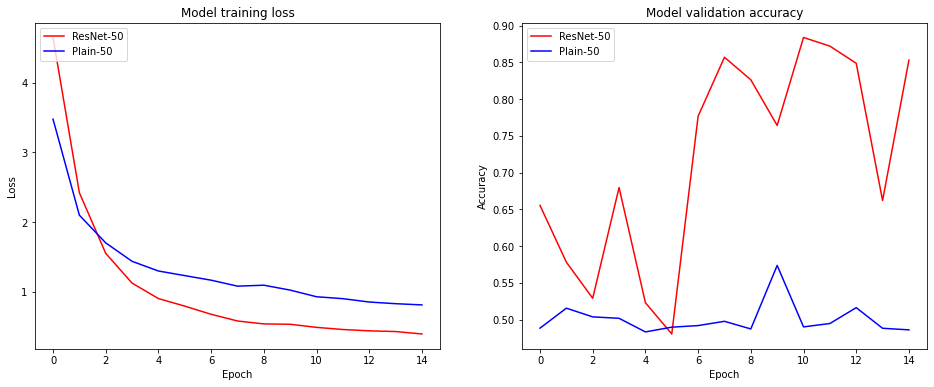

In [30]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history_resnet_50.history['loss'],'r')
plt.plot(history_plain_50.history['loss'],'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['ResNet-50', 'Plain-50'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_resnet_50.history['val_accuracy'], 'r')
plt.plot(history_plain_50.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['ResNet-50', 'Plain-50'], loc='upper left')
plt.show()

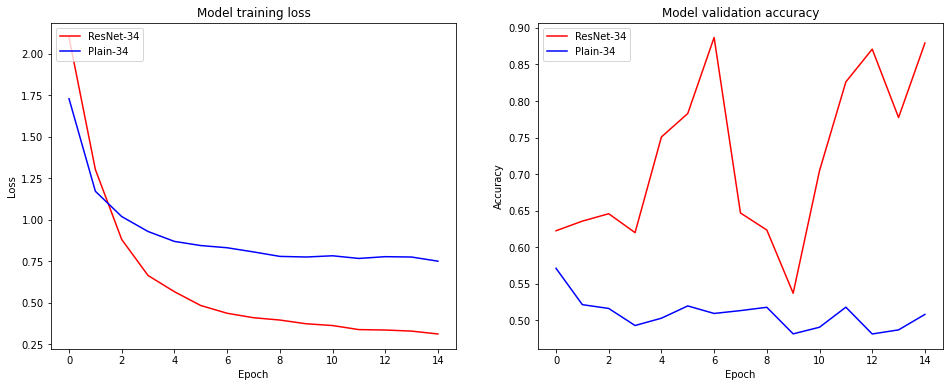

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history_resnet_34.history['loss'],'r')
plt.plot(history_plain_34.history['loss'],'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['ResNet-34', 'Plain-34'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_resnet_34.history['val_accuracy'], 'r')
plt.plot(history_plain_34.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['ResNet-34', 'Plain-34'], loc='upper left')
plt.show()

---

## 3. 결론

### 3.1 회고

- 결론만 도출했을 때는 검증 정확도나 손실 모두  Plain보다 Resnet이 우수한 성능을 보였다. 이번 고잉디퍼 노드에서는 정말 난이도가 대상승한 것 같다. 많은 양의 논문을 보기에는 버거웠고, 익스 노드보다 가이드 라인이 부족하기 때문에 어렵게 느꼈던 것 같다. 처음에는 혼자 해보려고 시도했으나 오류가 투성이고 해결할 수가 없었다. 아직 참고를 하지 않고서는 스스로 코드 작성을 하기에 한계를 많이 느낀다. 최대한 이해를 하나라도 더 하자는 것에 초점을 두기는 했으나, 코딩실력과 딥러닝 지식을 더 쌓을 필요를 아주 많이.. 필요해보인다.